# 1. Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

%matplotlib inline

start = datetime.datetime(2015,1,1)
end= datetime.datetime.now()

df=web.DataReader('TSLA' , 'yahoo', start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-17,589.729980,561.200012,575.549988,576.830017,32390400.0,576.830017
2021-05-18,596.250000,563.380005,568.000000,577.869995,36830600.0,577.869995
2021-05-19,566.210022,546.979980,552.549988,563.460022,39578400.0,563.460022
2021-05-20,588.849976,571.070007,575.000000,586.780029,30762600.0,586.780029
2021-05-21,596.679993,582.229980,596.109985,582.739990,14556584.0,582.739990


# 2. Statistical Analysis

In [2]:
df.info()
close_px=df['Adj Close']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1609 entries, 2014-12-31 to 2021-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1609 non-null   float64
 1   Low        1609 non-null   float64
 2   Open       1609 non-null   float64
 3   Close      1609 non-null   float64
 4   Volume     1609 non-null   float64
 5   Adj Close  1609 non-null   float64
dtypes: float64(6)
memory usage: 88.0 KB


### 2.1 close price and rolling average

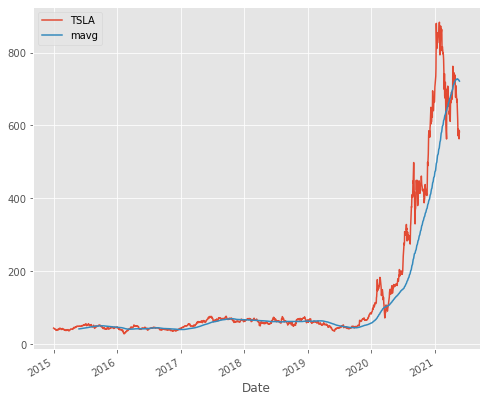

In [3]:
mavg=close_px.rolling(100).mean()

from matplotlib import style

plt.figure(figsize=(8,7))
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()
plt.show()

### 2.2 Returns

In [4]:
returns = close_px.pct_change().dropna()
returns

Date
2015-01-02   -0.013938
2015-01-05   -0.042041
2015-01-06    0.005664
2015-01-07   -0.001562
2015-01-08   -0.001564
                ...   
2021-05-17   -0.021891
2021-05-18    0.001803
2021-05-19   -0.024936
2021-05-20    0.041387
2021-05-21   -0.006885
Name: Adj Close, Length: 1608, dtype: float64

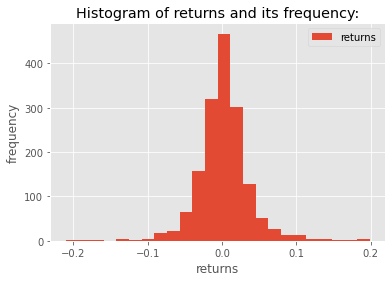

In [5]:


plt.hist(returns,bins="rice",label="returns")
plt.title('Histogram of returns and its frequency:')
plt.xlabel('returns')
plt.ylabel('frequency')
plt.legend()
plt.show()

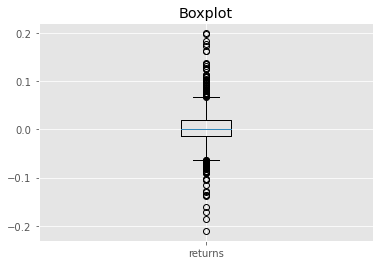

In [6]:
plt.boxplot(returns,labels=["returns"])
plt.title('Boxplot')
plt.show()

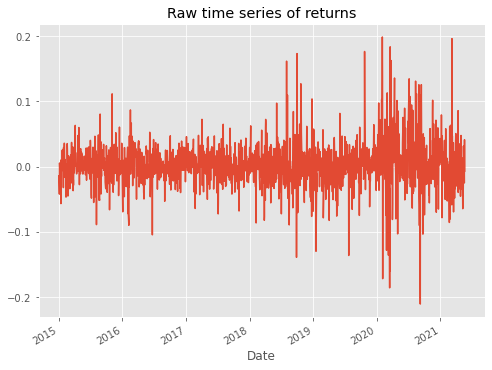

In [7]:
plt.figure(figsize=(8,6))
plt.title('Raw time series of returns')
returns.plot(label='returns')
plt.show()

# 3. Analysing Competitors Stocks

In [8]:
comp=['AAPL', 'TSLA','GE', 'GOOG', 'IBM', 'MSFT']
dfcomp = web.DataReader(comp,'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,AAPL,TSLA,GE,GOOG,IBM,MSFT
Date,,,,,,
2014-12-31,25.057606,44.481998,21.215006,524.958740,121.966751,41.074078
2015-01-02,24.819241,43.862000,21.038706,523.373108,123.198311,41.348206
2015-01-05,24.120045,42.018002,20.652521,512.463013,121.259781,40.967976
2015-01-06,24.122320,42.256001,20.207563,500.585632,118.644684,40.366688
2015-01-07,24.460564,42.189999,20.215967,499.727997,117.869293,40.879539
...,...,...,...,...,...,...
2021-05-17,126.269997,576.830017,13.150000,2321.409912,145.110001,244.615158
2021-05-18,124.849998,577.869995,12.970000,2303.429932,143.910004,242.520004
2021-05-19,124.690002,563.460022,13.090000,2308.709961,143.190002,243.119995


### 3.1 Correlation Analysis

In [9]:
retscomp=dfcomp.pct_change().dropna()
retscomp

Symbols,AAPL,TSLA,GE,GOOG,IBM,MSFT
Date,,,,,,
2015-01-02,-0.009513,-0.013938,-0.008310,-0.003020,0.010098,0.006674
2015-01-05,-0.028172,-0.042041,-0.018356,-0.020846,-0.015735,-0.009196
2015-01-06,0.000094,0.005664,-0.021545,-0.023177,-0.021566,-0.014677
2015-01-07,0.014022,-0.001562,0.000416,-0.001713,-0.006535,0.012705
2015-01-08,0.038422,-0.001564,0.012043,0.003153,0.021735,0.029418
...,...,...,...,...,...,...
2021-05-17,-0.009259,-0.021891,-0.008296,0.002267,0.002972,-0.011969
2021-05-18,-0.011246,0.001803,-0.013688,-0.007745,-0.008270,-0.008565
2021-05-19,-0.001282,-0.024936,0.009252,0.002292,-0.005003,0.002474


In [10]:
corr=retscomp.corr()
corr

Symbols,AAPL,TSLA,GE,GOOG,IBM,MSFT
Symbols,,,,,,
AAPL,1.000000,0.389402,0.321690,0.602054,0.444754,0.685569
TSLA,0.389402,1.000000,0.211833,0.349461,0.245202,0.398492
GE,0.321690,0.211833,1.000000,0.317441,0.491159,0.329440
GOOG,0.602054,0.349461,0.317441,1.000000,0.472577,0.725332
IBM,0.444754,0.245202,0.491159,0.472577,1.000000,0.521834
MSFT,0.685569,0.398492,0.329440,0.725332,0.521834,1.000000


### 3.2 Plotting the Correlations

Correlation between diff. stocks


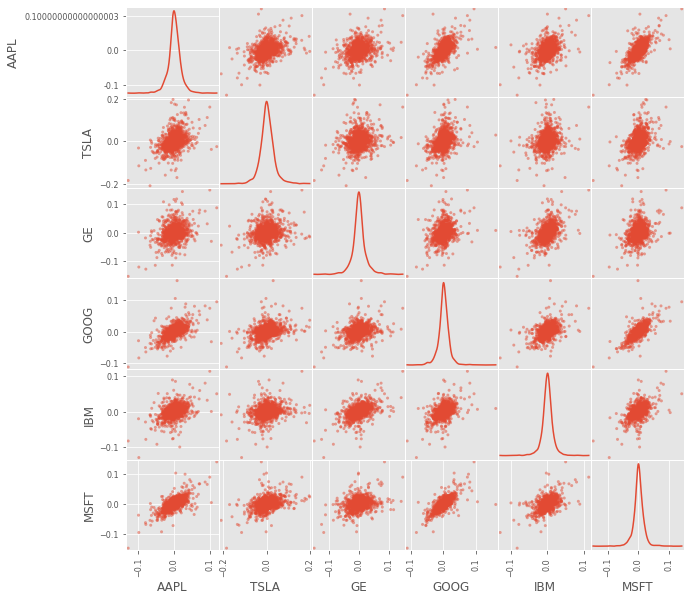

In [11]:
pd.plotting.scatter_matrix(retscomp,diagonal='kde' , figsize=(10,10))
print('Correlation between diff. stocks')
plt.show()

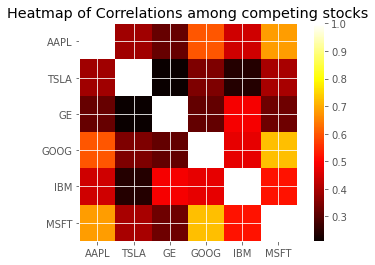

In [12]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.title('Heatmap of Correlations among competing stocks')
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);


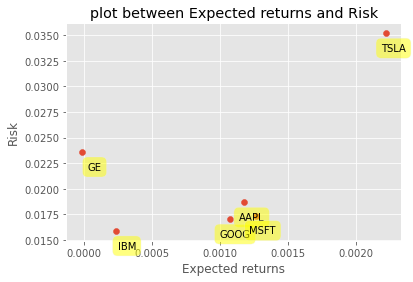

In [13]:
plt.scatter(retscomp.mean(),retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('plot between Expected returns and Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        
       )


# 4.Predicting Stock Prices Using An ARIMA Model

### 4.1 Checking Autocorrelation

#### 4.1.1 For Returns

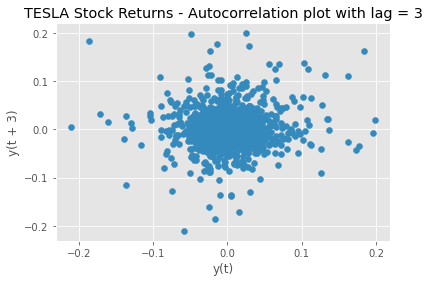

In [14]:
pd.plotting.lag_plot(returns,lag=3)
plt.title('TESLA Stock Returns - Autocorrelation plot with lag = 3')
plt.show()

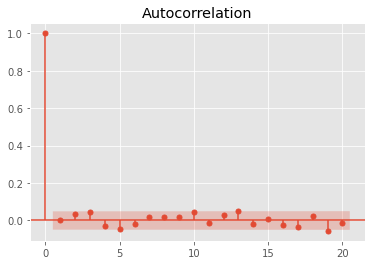

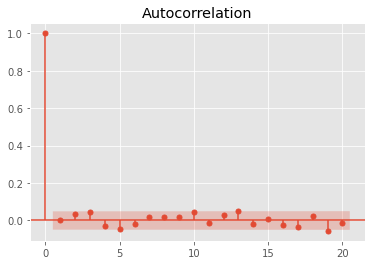

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns,lags = 20)

#### 4.1.2 For Stock Price

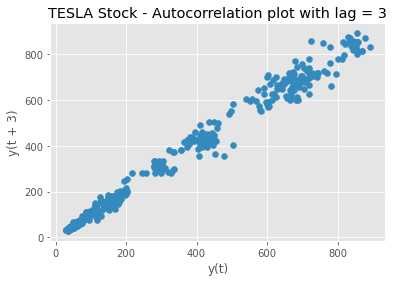

In [16]:
plt.figure()
pd.plotting.lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

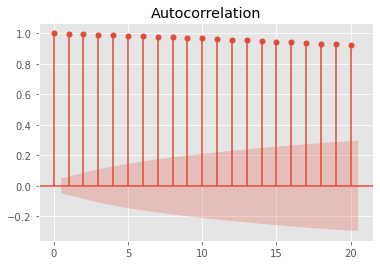

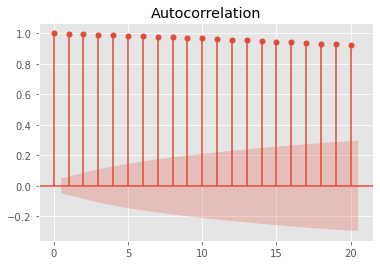

In [17]:
plot_acf(df['Open'], lags=20)

### 4.2 Building the Predictive Model

##### 4.2.1 Splitting test and train set

In [26]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

##### 4.2.2 Model

In [29]:
from statsmodels.tsa.arima.model import ARIMA


model_predictions=[]
n_test=len(test_data)

history = [x for x in training_data]

for time_point in range(n_test):
    model=ARIMA(history,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
    


##### 4.2.3 Error 

In [37]:
from sklearn.metrics import mean_squared_error

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 316.94679621560516


##### 4.2.4 Visualization

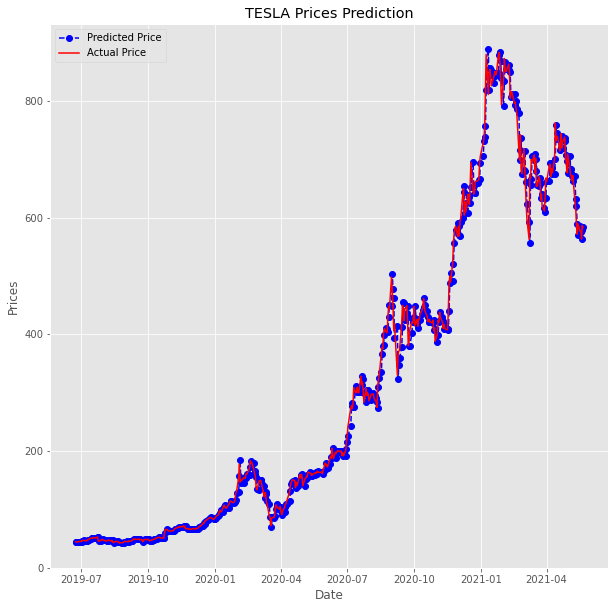

In [42]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(10,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()